<a href="https://colab.research.google.com/github/StephenDjan/Milestone/blob/main/Croffie_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS620 – Introduction to Data Science and Analytics
# Homework Exercise 3 (HW3): Spring 2025
# @ Data Scientist/author: Stephen Croffie Djan  - UIN: 01297012

In [6]:
import pandas as pd
import pandas as pd
df = pd.read_csv("/content/HT_2013_2023.csv")
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT,OTHER_COUNT
0,2013,MO0950000,St. Louis County Police Department,NaN,County,MO,Missouri,West North Central,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,6,0.0,6,0,NaN
1,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN
2,2013,OH0020000,Allen,NaN,County,NaN,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,1,0.0,0,0,NaN
3,2013,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN
4,2013,TNMPD0000,Memphis,NaN,City,TN,Tennessee,East South Central,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,3,0.0,2,0,NaN


Task 1: Data Wrangling [data munging and data cleaning]

In [5]:
duplicate_columns = df.columns[df.T.duplicated()] # Check for duplicate columns
redundant_columns = ['case_id']  # Replace with actual redundant columns
df = df.drop(columns=redundant_columns, errors='ignore')
print("Duplicate Columns:", duplicate_columns.tolist())
print("Columns after removal:", df.columns)


Duplicate Columns: []
Columns after removal: Index(['DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'COUNTY_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'OFFENSE_SUBCAT_ID', 'OFFENSE_NAME',
       'OFFENSE_SUBCAT_NAME', 'ACTUAL_COUNT', 'UNFOUNDED_COUNT',
       'CLEARED_COUNT', 'JUVENILE_CLEARED_COUNT', 'OTHER_COUNT'],
      dtype='object')


1.2 Identify the columns that has missing values or outliers or improperly formatted, or typographical error if any then fix those. You are free to choose any one of the techniques to handle missing values or other data cleaning issues.

In [5]:
import pandas as pd
# The 'df' variable is assigned the dataframe read from the CSV file
df = pd.read_csv("/content/HT_2013_2023.csv")
df.head()

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Fill missing values for numeric columns using median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Fill missing values for numeric columns using median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns using mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Missing Values per Column:
 DATA_YEAR                    0
ORI                          2
PUB_AGENCY_NAME              0
PUB_AGENCY_UNIT           4871
AGENCY_TYPE_NAME             0
STATE_ABBR                   2
STATE_NAME                   2
DIVISION_NAME                2
COUNTY_NAME                  0
REGION_NAME                  2
POPULATION_GROUP_CODE       15
POPULATION_GROUP_DESC       12
OFFENSE_SUBCAT_ID            0
OFFENSE_NAME                 0
OFFENSE_SUBCAT_NAME          0
ACTUAL_COUNT                 0
UNFOUNDED_COUNT           4033
CLEARED_COUNT                0
JUVENILE_CLEARED_COUNT       0
OTHER_COUNT               5233
dtype: int64
Missing Values per Column:
 DATA_YEAR                    0
ORI                          2
PUB_AGENCY_NAME              0
PUB_AGENCY_UNIT           4871
AGENCY_TYPE_NAME             0
STATE_ABBR                   2
STATE_NAME                   2
DIVISION_NAME                2
COUNTY_NAME                  0
REGION_NAME                  2
P

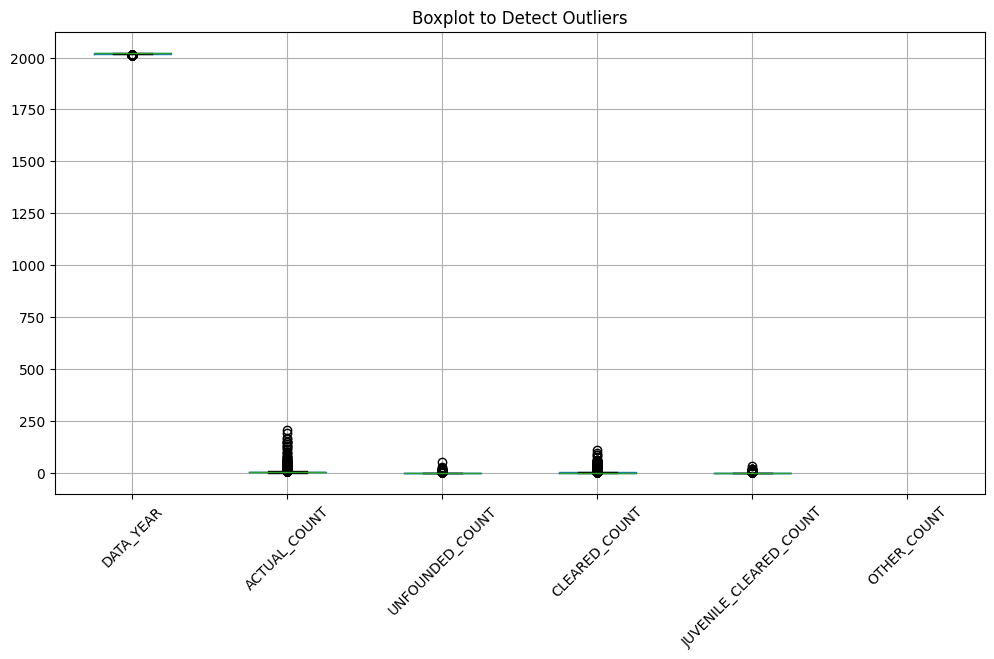

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()


I chose the median to fill missing values in numerical columns because it is less sensitive to outliers, ensuring that extreme values do not distort the data. For categorical columns, we used the mode since it preserves the most common category without introducing bias. Dropping rows was avoided to prevent data loss, and predictive imputation was not used due to its complexity.

A boxplot was used to detect outliers because it visually highlights extreme values using quartiles, making it easier to identify potential anomalies in the dataset.

**Task 2: NOW you have a complete clean dataset ready to execute the following tasks [EDA].**


In [19]:
# Summary statistics for numerical features helps identify trends, central tendencies, and data distributions.
summary_stats = df.describe()
df.describe()


,DATA_YEAR,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT,OTHER_COUNT
count,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,0.0
mean,2020.152494,3.635009,0.119625,1.476018,0.075483,NaN
std,2.439415,9.973310,1.207861,5.025912,0.844707,NaN
min,2013.000000,-1.000000,0.000000,0.000000,0.000000,NaN
25%,2019.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,2021.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,2022.000000,3.000000,0.000000,1.000000,0.000000,NaN
max,2023.000000,204.000000,51.000000,108.000000,34.000000,NaN


2.1.1 Develop any two interesting questions/hypotheses and provide answers to those via code solution.

Questions:
1. Is there a seasonal pattern in human trafficking cases?

2. What is the distribution of human trafficking offenses by state?

<ipython-input-21-e76815360258>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Blues')


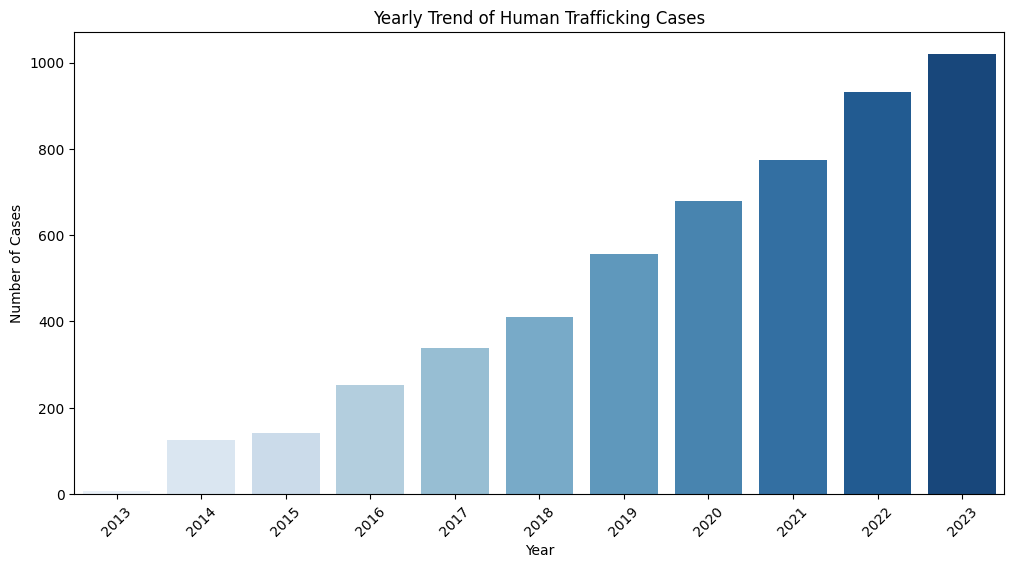

In [21]:
#Ques 1 - analyze the number of cases per month/year to identify trends.
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime format (update column name if different)
# Assuming the column with date information is named 'DATA_YEAR'
df['report_date'] = pd.to_datetime(df['DATA_YEAR'], format='%Y')

# Extract year and month
df['Year'] = df['report_date'].dt.year
df['Month'] = df['report_date'].dt.month

# Plot trend over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='Blues')
plt.xticks(rotation=45)
plt.title("Yearly Trend of Human Trafficking Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()

<ipython-input-28-9a1fb982053d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACTUAL_COUNT', y='STATE_NAME', data=state_offense_counts, palette='Reds_r')


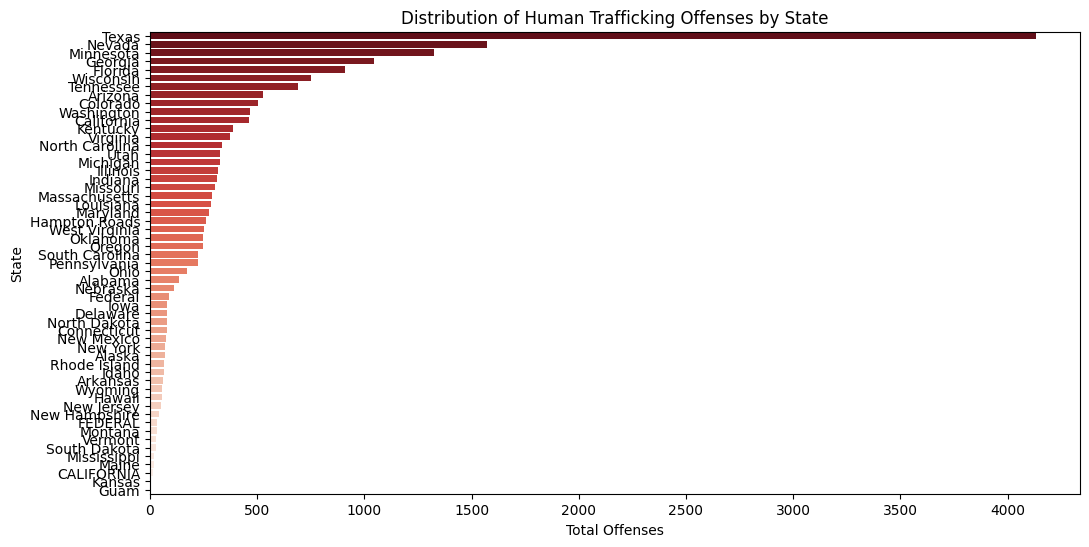

In [28]:
#Ques 2 - Offence distribution by state
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'STATE_NAME' and 'ACTUAL_COUNT' exist
if 'STATE_NAME' in df.columns and 'ACTUAL_COUNT' in df.columns:
    # Aggregate total cases per state
    state_offense_counts = df.groupby('STATE_NAME')['ACTUAL_COUNT'].sum().reset_index()

    # Sort states by offense count
    state_offense_counts = state_offense_counts.sort_values(by='ACTUAL_COUNT', ascending=False)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ACTUAL_COUNT', y='STATE_NAME', data=state_offense_counts, palette='Reds_r')
    plt.title("Distribution of Human Trafficking Offenses by State")
    plt.xlabel("Total Offenses")
    plt.ylabel("State")
    plt.show()
else:
    print("Error: One or both of the columns 'STATE_NAME' or 'ACTUAL_COUNT' are missing.")


** 2.2 Present the data anomalies/clustering/classification that you found in any of these features with short summary [15 points] **

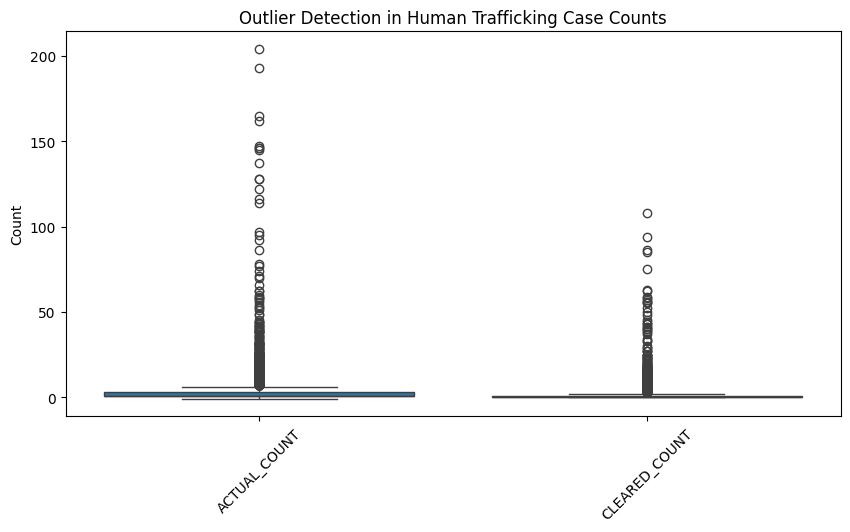

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for anomaly detection
numerical_features = ['ACTUAL_COUNT', 'CLEARED_COUNT']

# Create boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_features])
plt.title("Outlier Detection in Human Trafficking Case Counts")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Identify Clusters or Patterns Using Scatterplots

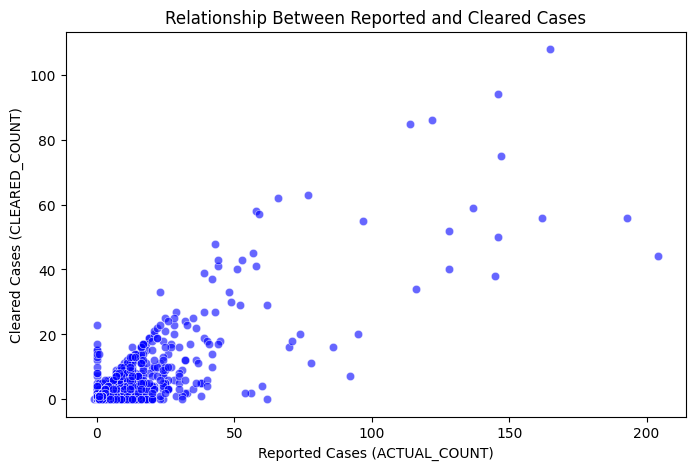

In [30]:
# Scatterplot to analyze patterns in human trafficking cases
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['ACTUAL_COUNT'], y=df['CLEARED_COUNT'], alpha=0.6, color='blue')
plt.title("Relationship Between Reported and Cleared Cases")
plt.xlabel("Reported Cases (ACTUAL_COUNT)")
plt.ylabel("Cleared Cases (CLEARED_COUNT)")
plt.show()


In summary, The scatterplot shows the relationship between reported human trafficking cases (ACTUAL_COUNT) and cleared cases (CLEARED_COUNT).
The data suggests that most human trafficking cases occur in areas with lower report counts, and case clearance is generally proportional to reports. However, outliers indicate that some regions face challenges in resolving cases efficiently.

**Task 3: Feature creation/transformation/extraction**

Crime Clearance Rate = (CLEARED_COUNT / ACTUAL_COUNT) * 100

*This feature indicates the percentage of reported crimes that were cleared. A higher rate suggests better law enforcement effectiveness.*

Unfound Rate = (UNFOUNDED_COUNT / ACTUAL_COUNT) * 100

*This feature shows the percentage of reported cases that were deemed unfounded. A higher rate might suggest reporting errors or misclassification of incidents.*

In [32]:
import numpy as np # Import the numpy library with the alias 'np'

# Avoid division by zero by replacing zeros with NaN (to be handled appropriately)
df['Crime_Clearance_Rate'] = (df['CLEARED_COUNT'] / df['ACTUAL_COUNT']) * 100
df['Crime_Clearance_Rate'] = df['Crime_Clearance_Rate'].replace([np.inf, -np.inf], np.nan)  # Handling division by zero

df['Unfound_Rate'] = (df['UNFOUNDED_COUNT'] / df['ACTUAL_COUNT']) * 100
df['Unfound_Rate'] = df['Unfound_Rate'].replace([np.inf, -np.inf], np.nan)  # Handling division by zero

# Display summary statistics of new features
df[['Crime_Clearance_Rate', 'Unfound_Rate']].describe()

,Crime_Clearance_Rate,Unfound_Rate
count,5015.000000,5015.000000
mean,34.746961,2.017662
std,50.994826,39.682089
min,0.000000,-100.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,100.000000,0.000000
max,1400.000000,2400.000000


**Task 4: Sketch/draw a predictive data model or recommender system or decision support systems or data visualization dash boards that with selected features.**

This is a data flow diagram of a predictive model for human trafficking detection. It illustrates the flow from data collection (structured and unstructured data) through feature engineering, model selection, training, evaluation, and deployment. The model is designed to assist the USA Border Control Office in identifying potential trafficking cases in real-time, improving response and intervention strategies.

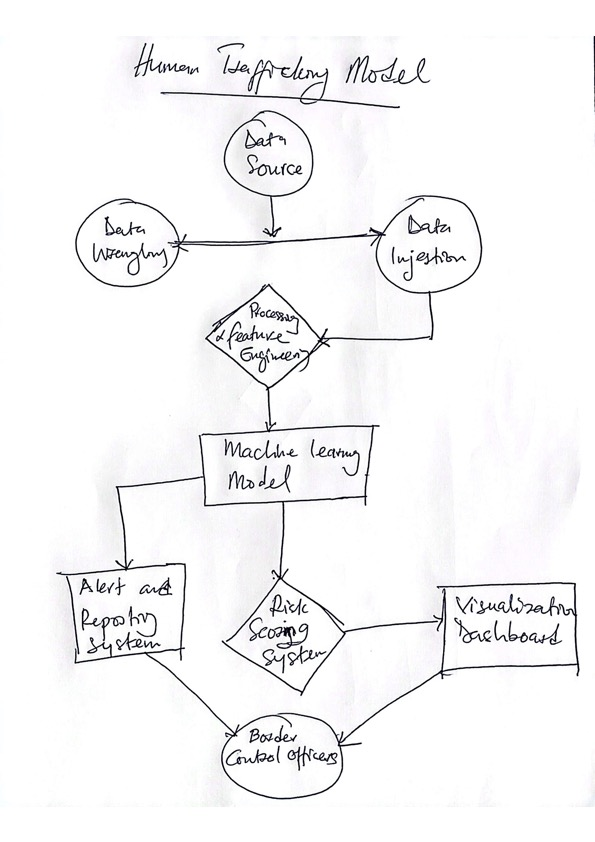

Human Trafficking Detection System for USA Border Control

1. Introduction to Human trafficking is a severe global crime that requires advanced technology to detect and prevent. This document outlines the design of a machine learning-based system that aids the USA Border Control Office in identifying potential trafficking cases by analyzing structured and unstructured data sources.

2. **System Objectives**

Identify potential human trafficking cases in real time.

Improve border security by integrating AI-driven risk assessment.

Provide actionable intelligence to law enforcement officers.

Reduce false positives while ensuring high detection rates.

3. **Data Sources**

Border Entry/Exit Logs: Passport data, travel history, ticketing information.

Watchlists & Criminal Databases: Interpol, FBI, Homeland Security data.

Victim & Trafficker Profiles: Historical case studies and behavioral patterns.

Social Media & Communication Data: Online forums, encrypted messages.

Biometric & Facial Recognition Data: Surveillance footage and live scans.

4. **Machine Learning Model Functionality**

Supervised Learning: Trains on labeled trafficking cases for classification.

Unsupervised Learning: Detects anomalies in travel patterns and behavior.

Natural Language Processing (NLP): Analyzes communication signals and sentiment.

Graph-Based Analysis: Identifies networks of traffickers and victims.**bold text**

5.**System Architecture**

Data Ingestion Layer: Collects structured and unstructured data from multiple sources.

Preprocessing & Feature Engineering: Cleans, normalizes, and structures data for analysis.

Machine Learning Model & Risk Scoring: Assigns risk levels to individuals based on behavioral patterns.

Alert & Reporting System: Sends notifications to border control officers when a high-risk individual is flagged.

Visualization Dashboard: Displays high-risk trends, geographic hotspots, and suspect profiles.

6. **Expected Output**

Risk Scores: Each traveler is assigned a trafficking risk level (Low, Medium, High).

Flagged Alerts: Officers receive alerts on high-risk individuals in real time.

Investigation Reports: Generates case reports with supporting evidence.

Trend Analysis: Identifies trafficking routes, hotspots, and operational patterns.

7. **Implementation Considerations**

Data Privacy & Security: Ensure compliance with data protection laws.

Bias Mitigation: Regularly update models to prevent racial, gender, or nationality bias.

Scalability: The system should handle large-scale real-time data processing.

Integration with Existing Systems: Compatible with border control databases and law enforcement tools.

8. **Conclusion**The proposed human trafficking detection system leverages advanced machine learning and AI techniques to assist border control officers in identifying and preventing human trafficking activities. By integrating real-time data analysis, predictive modeling, and alerting mechanisms, this system enhances national security and aids in the global fight against human trafficking.



**Task 5: Convert the Human trafficking dataset in JSON format (via Python coding) and import that JSON file to your MongoDB in a database called “CrimeDataUSA”. Upload the screenshots of the steps you performed on “importing JSON file into MongoDB” in your Colab Notebook as pictures with short info [10 points].**

Step 1 - Importing CSV and Converting using Python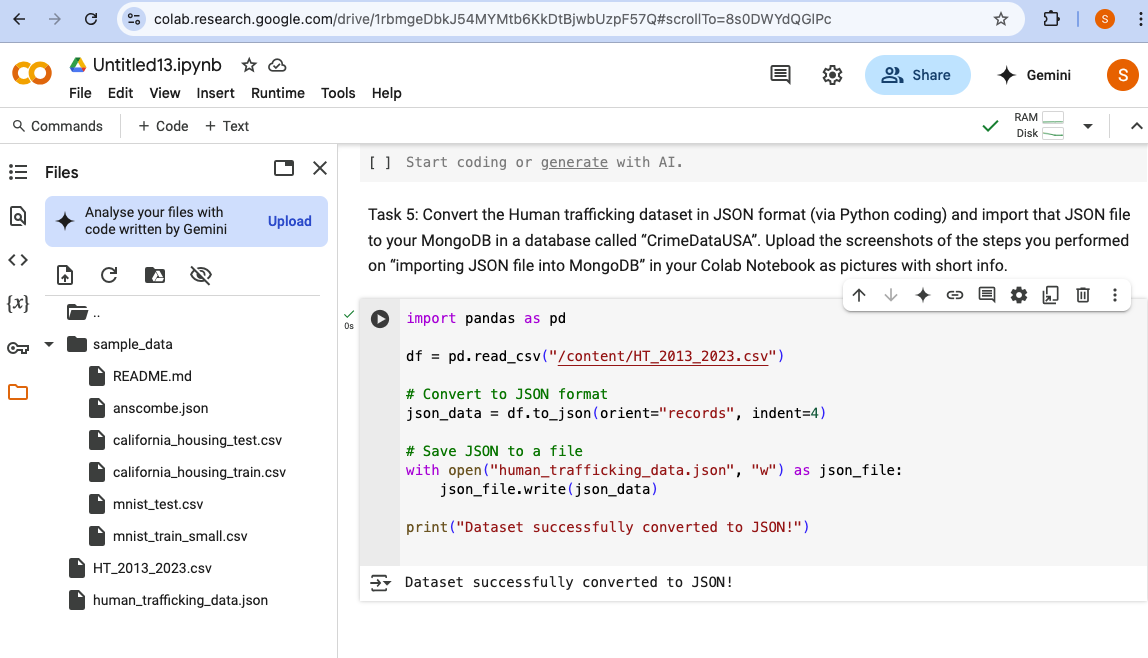

Screenshot showing python codes and json file created in the sample data folder. After the import and conversion it created the file human_trafficking_data.json file

Step2 - Showing json file downloaded to local machine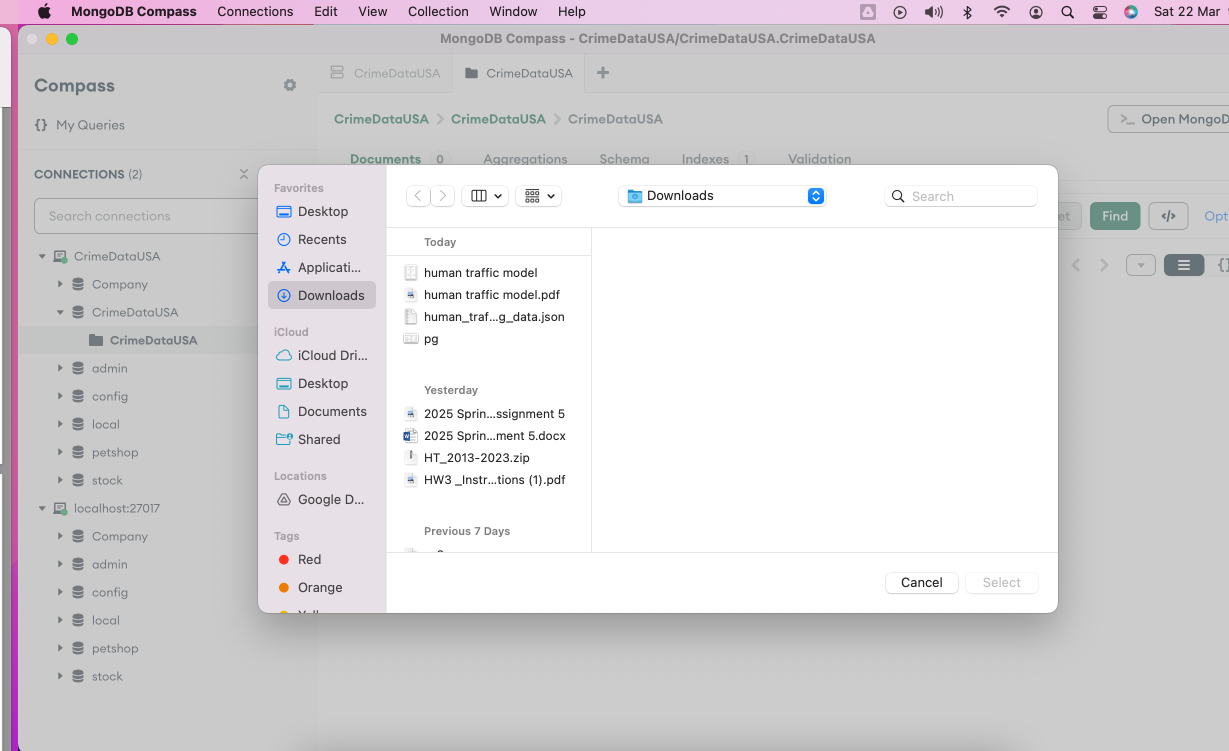

Step 3 - Creation of database using MongoDB compass UI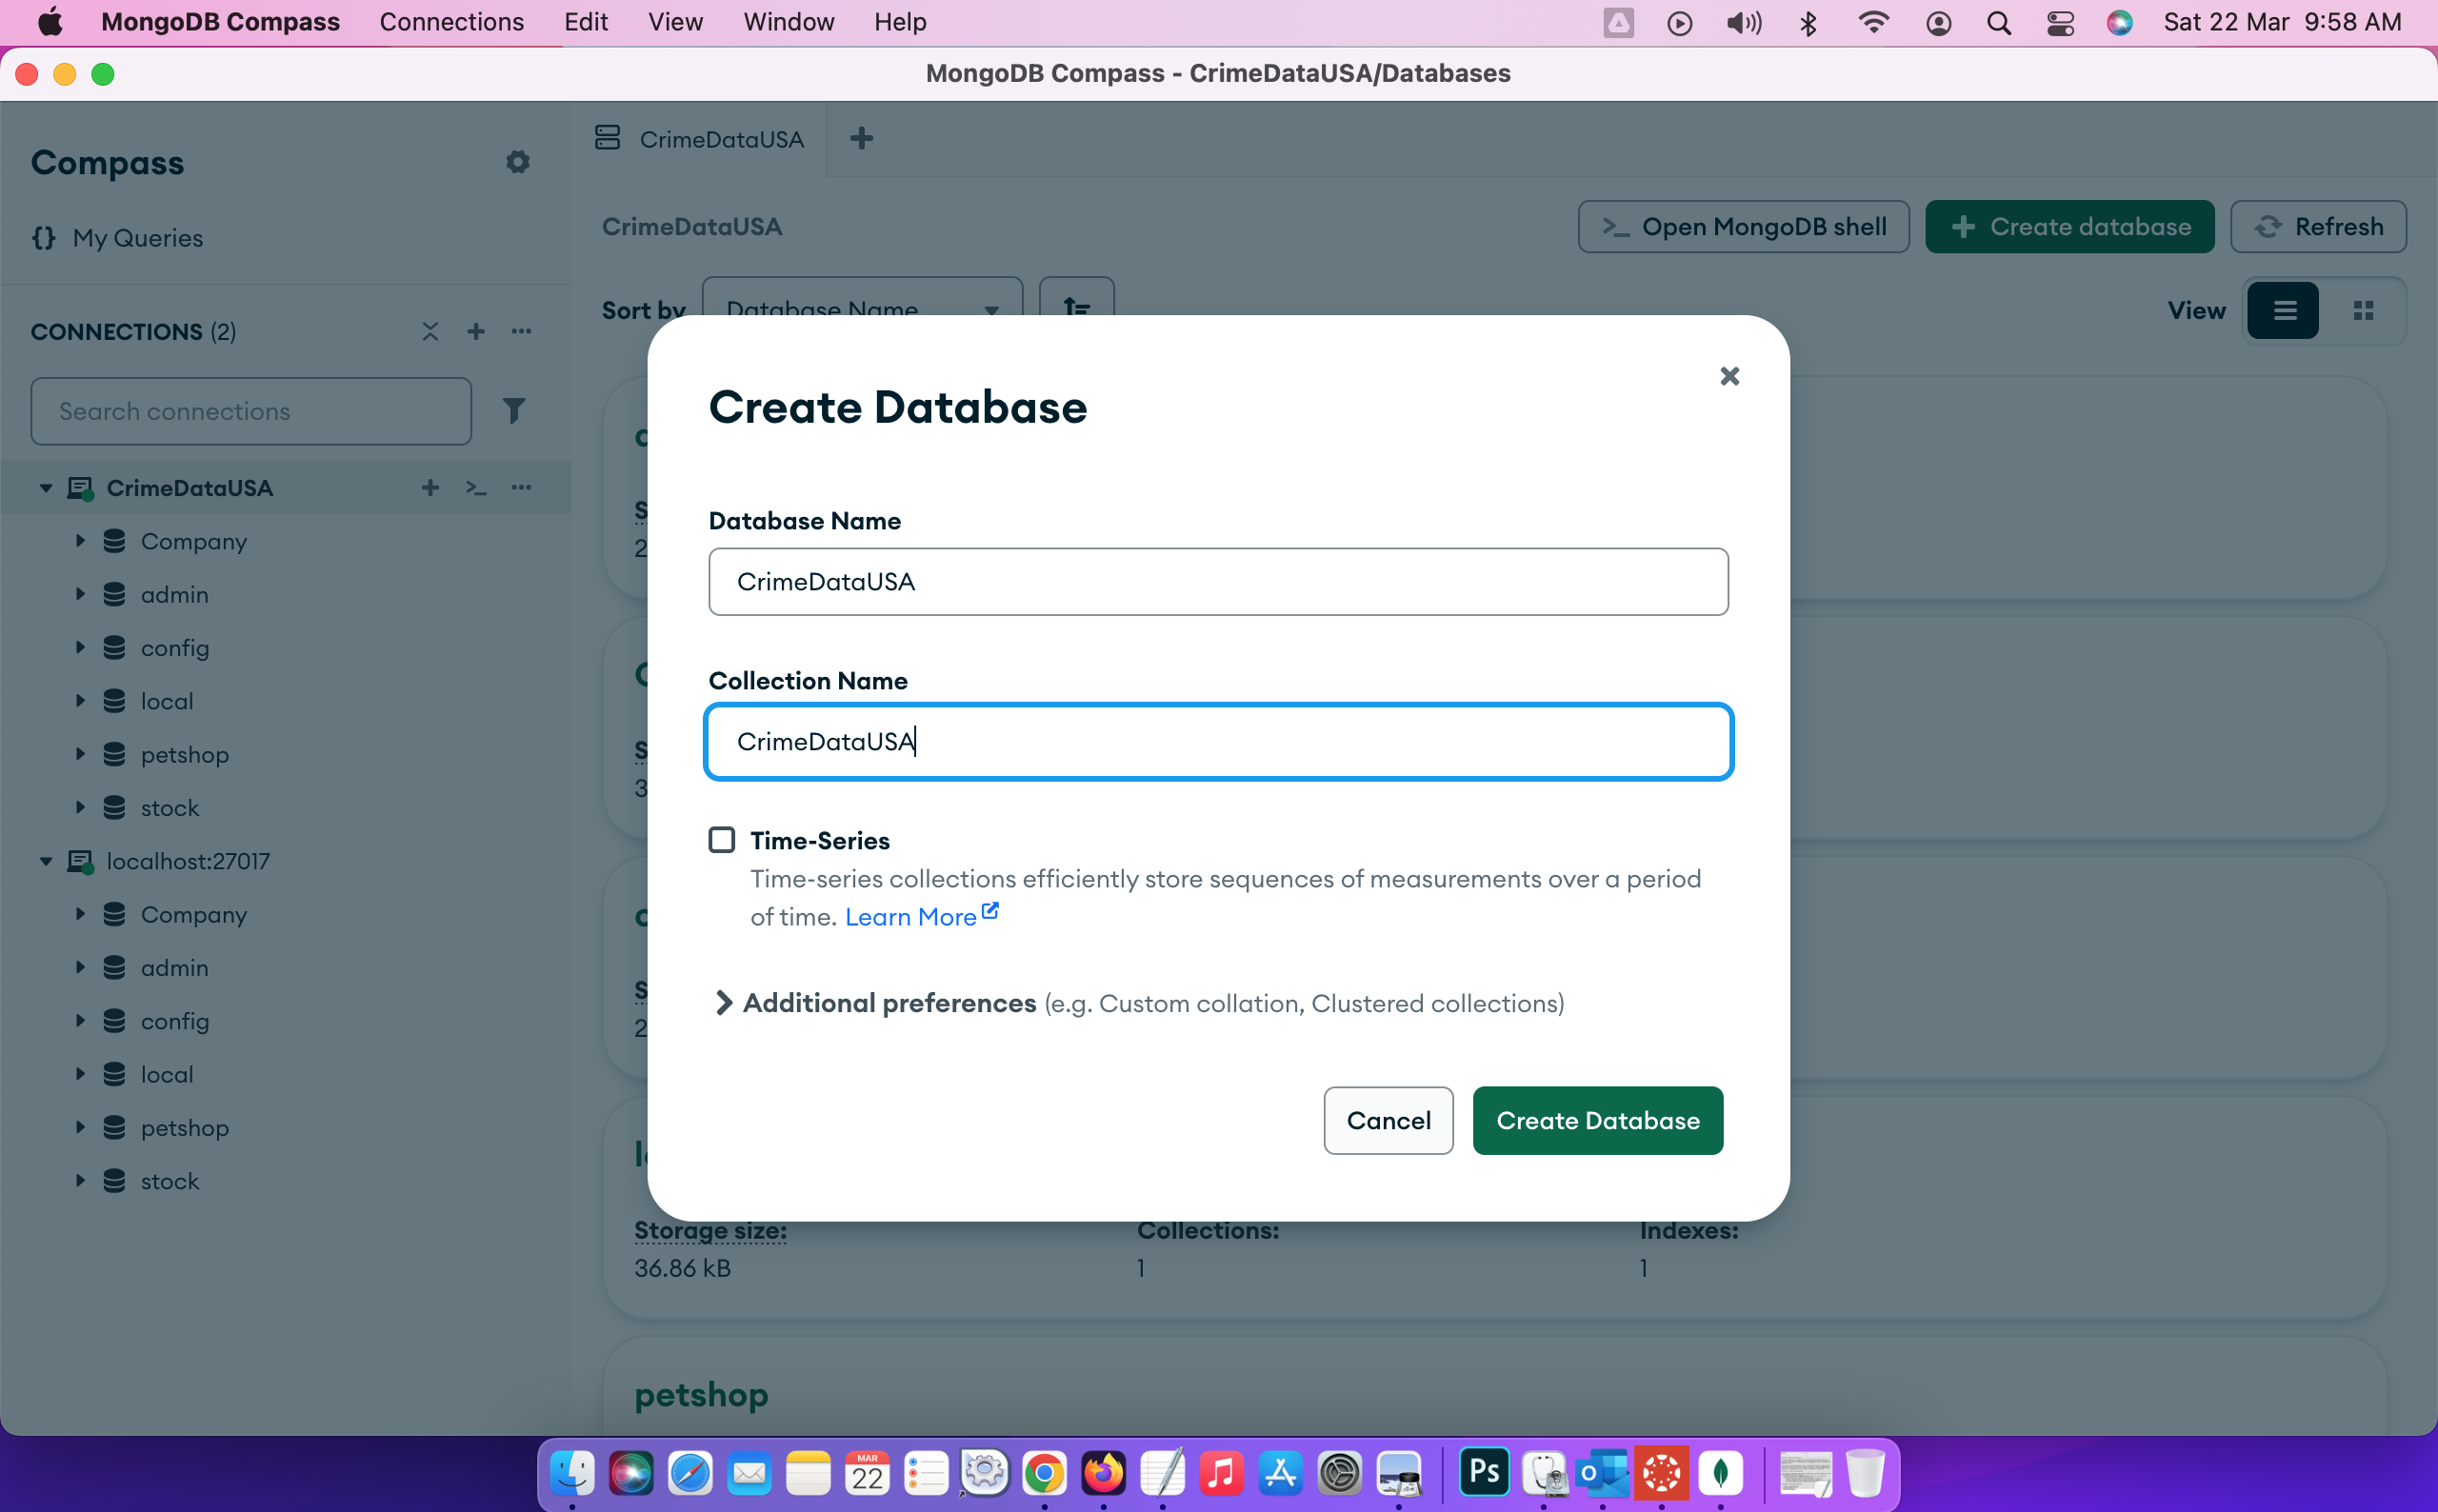

Step 4 - Human traffic json file import into CrimeDataUSA database 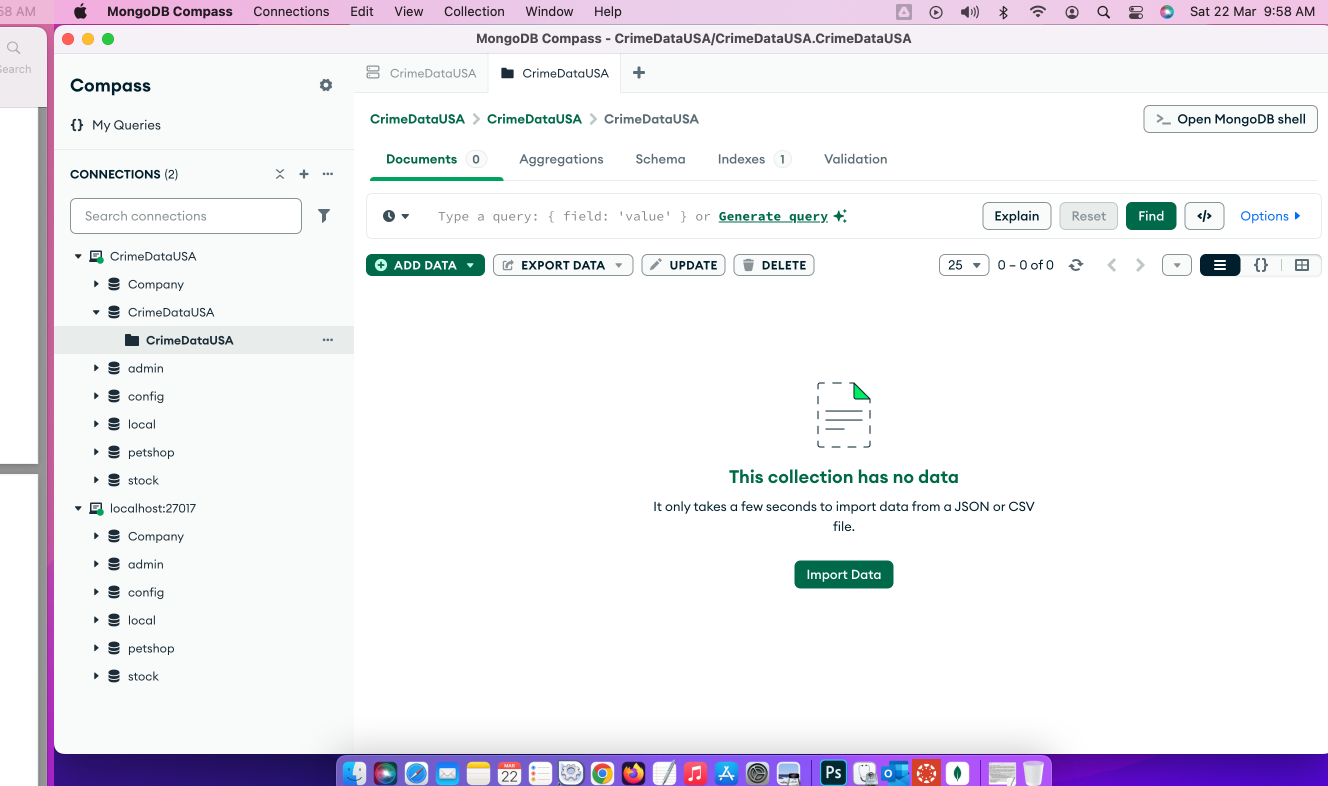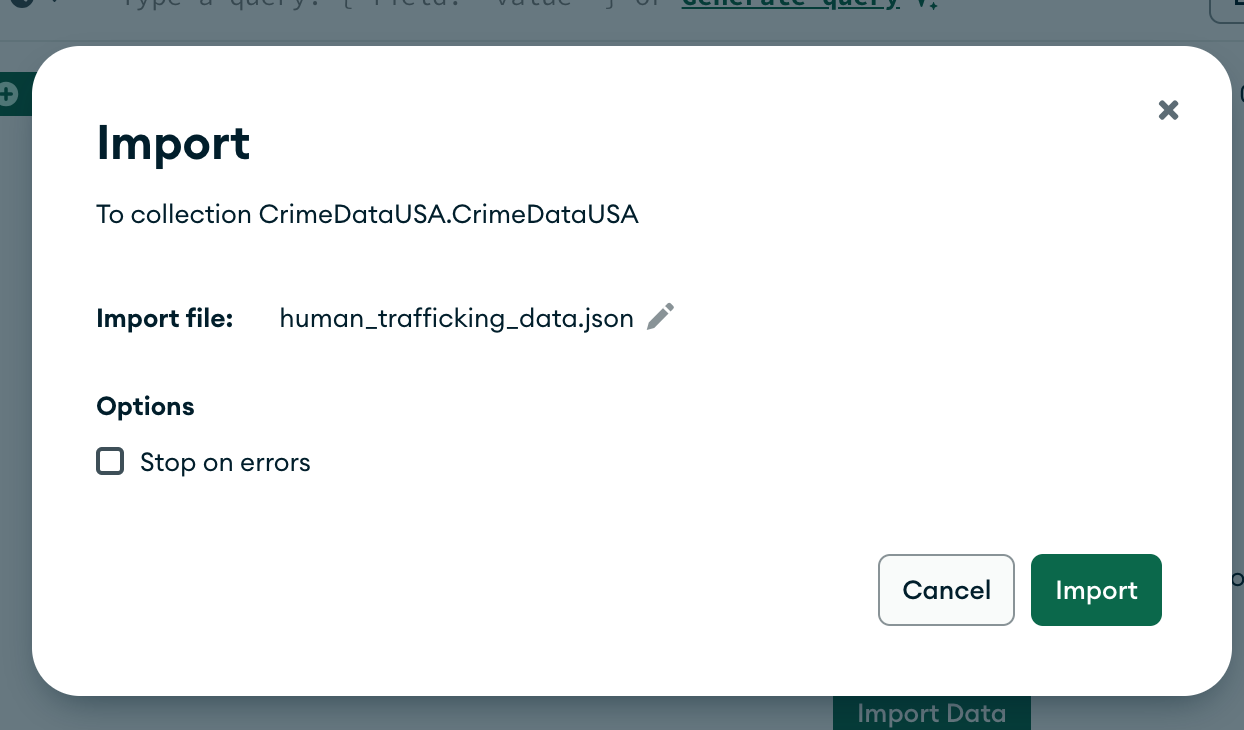

Step 5 - Final step with with MongoDB displaying CrimeDataUSA Database imported 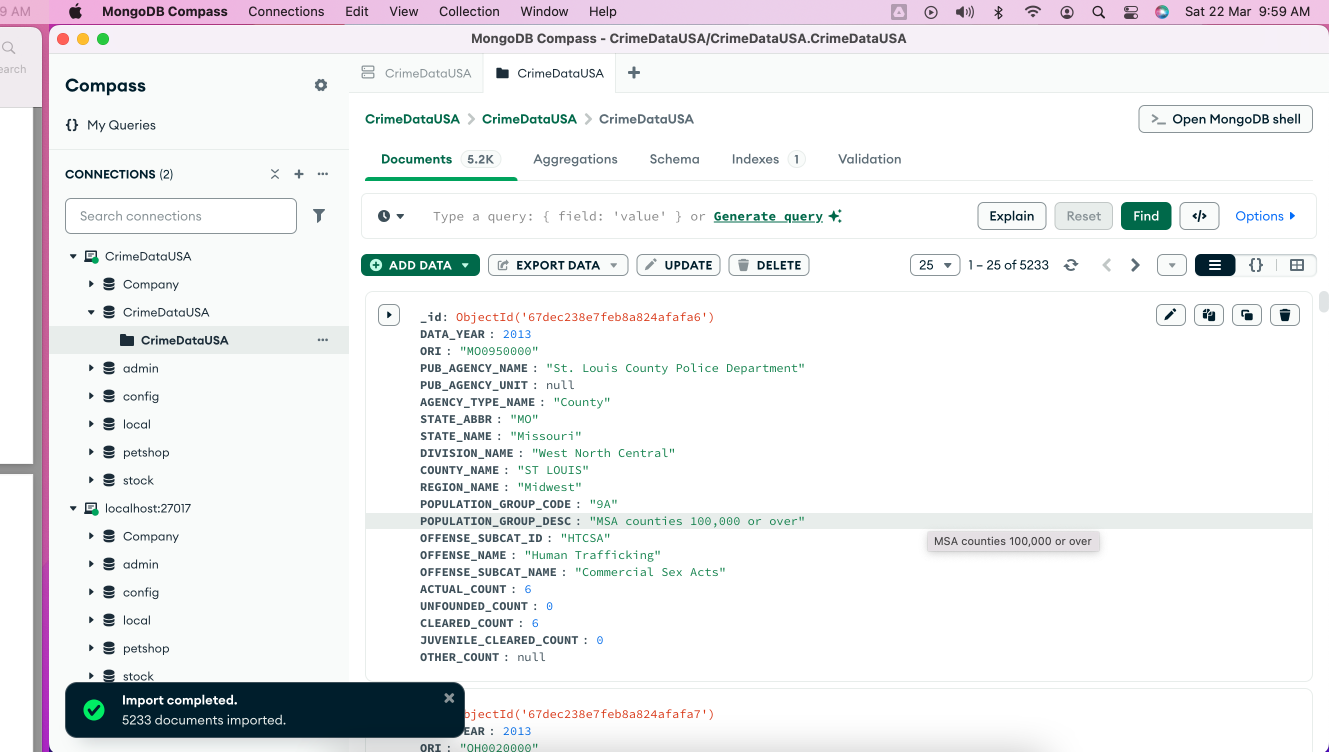